<a href="https://colab.research.google.com/github/Prakum14/Testfiles/blob/master/M3_NB_MiniProject_1_ResumeClassification_Using_Bert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Programme in AI and MLOps
## A programme by IISc and TalentSprint
### Mini-Project 1: Resume Classification

## Learning Objectives

At the end of the mini-project, you will be able to :

* perform data preprocessing, EDA on the resume dataset
* fine-tune Bert model for resume classification

## Dataset Description

The data is in CSV format, with two features: Category, and Resume.

**Category** -  Industry sector to which the resume belongs to, and

**Resume** - The complete CV (text) of the candidate.

##  Grading = 10 Points

## Information

Companies often receive thousands of resumes for each job posting and employ dedicated screening officers to screen qualified candidates. Finding suitable candidates for an open role from a database of 1000s of resumes can be a tough task. Automated resume categorization can speeden the candidate selection process. Such automation can really ease the tedious process of fair screening and shortlisting the right candidates and aid quick decisionmaking.

To learn more about this, click [here](https://www.sciencedirect.com/science/article/pii/S187705092030750X).

**Problem Statement:** Fine-tune a pre-trained Bert model for resume classification.

*For fine-tuning Bert, refer to the HuggingFace platform session held on 17 Aug.*

### Install dependencies

After installing the below dependencies ***Restart the session/runtime***.

In [ ]:
!pip -q uninstall pyarrow -y
!pip -q install pyarrow==15.0.2
!pip -q install datasets
!pip -q install accelerate
!pip -q install transformers

# Ignore the Error/Warning showing after running this cell

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.3/38.3 MB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
!wget https://lh3.googleusercontent.com/keep-bbsk/AFgXFlLshEsxcecs0h-7bdhC4yooaOSBeDh7O0N5aN0-WK66-Yd9GpZI4IYz2-d8s9adaWj1zMgOAtxdUsB_jc2xgElzb8fl7lEi59ICDH_i-UnfzMkOhqcN-A=s361 -O img.gif

--2025-01-11 05:08:19--  https://lh3.googleusercontent.com/keep-bbsk/AFgXFlLshEsxcecs0h-7bdhC4yooaOSBeDh7O0N5aN0-WK66-Yd9GpZI4IYz2-d8s9adaWj1zMgOAtxdUsB_jc2xgElzb8fl7lEi59ICDH_i-UnfzMkOhqcN-A=s361
Resolving lh3.googleusercontent.com (lh3.googleusercontent.com)... 142.250.125.132, 2607:f8b0:4001:c56::84
Connecting to lh3.googleusercontent.com (lh3.googleusercontent.com)|142.250.125.132|:443... connected.
HTTP request sent, awaiting response... 403 Forbidden
2025-01-11 05:08:19 ERROR 403: Forbidden.



### <font color="#990000">Restart Session/Runtime</font>

### Import required packages

In [ ]:
from datasets import Dataset, DatasetDict

from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from transformers import TrainingArguments
from transformers import Trainer
from transformers import pipeline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


### Downloading the data

In [ ]:
#@title Download the data
!wget -qq https://cdn.iisc.talentsprint.com/CDS/Datasets/UpdatedResumeDataSet.csv
!ls | grep '.csv'

UpdatedResumeDataSet.csv


**Exercise 1: Read the UpdatedResumeDataset.csv dataset [0.5 Mark]**

**Hint:** pd.read_csv( , encoding='utf-8')

In [ ]:
# Read the dataset
# YOUR CODE HERE
csv_data = pd.read_csv("/content/UpdatedResumeDataSet.csv",encoding='utf8')

### Pre-processing and EDA

**Exercise 2: Display  all the categories of resumes and their counts in the dataset [0.5 Mark]**



In [ ]:
# Display the distinct categories of resume
csv_data["Category"].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [ ]:
csv_data.describe()

,Category,Resume
count,962,962
unique,25,166
top,Java Developer,"Technical Skills Web Technologies: Angular JS,..."
freq,84,18


In [ ]:
# Displaying the number of distinct categories of resume
len(csv_data["Category"].unique())

25

In [ ]:
# Display the distinct categories of resume and the number of records belonging to each category
csv_data["Category"].value_counts()

,count
Category,
Java Developer,84
Testing,70
DevOps Engineer,55
Python Developer,48
Web Designing,45
HR,44
Hadoop,42
Blockchain,40
ETL Developer,40


**Exercise 3: Create the count plot of different categories [0.5 Mark]**

**Hint:** Use `sns.countplot()`

<Axes: xlabel='count', ylabel='Category'>

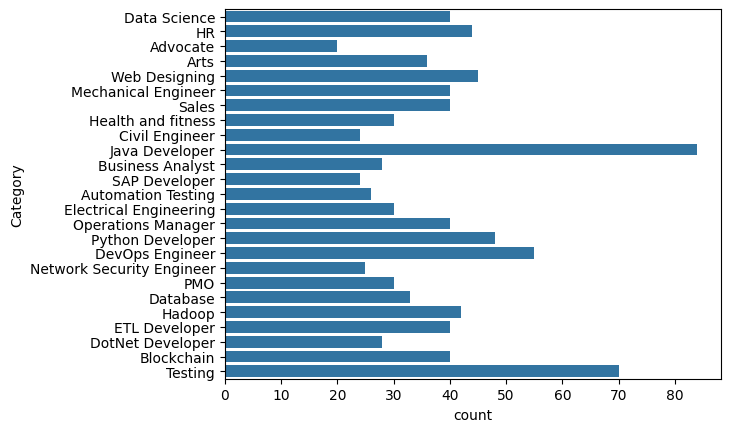

In [ ]:
sns.countplot(y = csv_data["Category"])

**Exercise 4: Create a pie plot depicting the percentage of resume distributions category-wise. [0.5 mark]**

**Hint:** Use [plt.pie()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html) and [plt.get_cmap](https://matplotlib.org/stable/tutorials/colors/colormaps.html) for color mapping the pie chart.

In [ ]:
targetCounts = csv_data['Category'].value_counts()
targetLabels  = targetCounts.index
# Make square figures and axes
plt.figure(1, figsize=(25,25))
the_grid = GridSpec(2, 2)

# YOUR CODE HERE to display pie chart with color coding (eg. `coolwarm`)

#Question

<Figure size 2500x2500 with 0 Axes>

In [ ]:
from matplotlib import cm
colormap = cm.get_cmap('coolwarm')

#colors_map = plt.get_cmap("coolwarm")
#cmap = plt.get_cmap("coolwarm")

TypeError: imshow() missing 1 required positional argument: 'X'

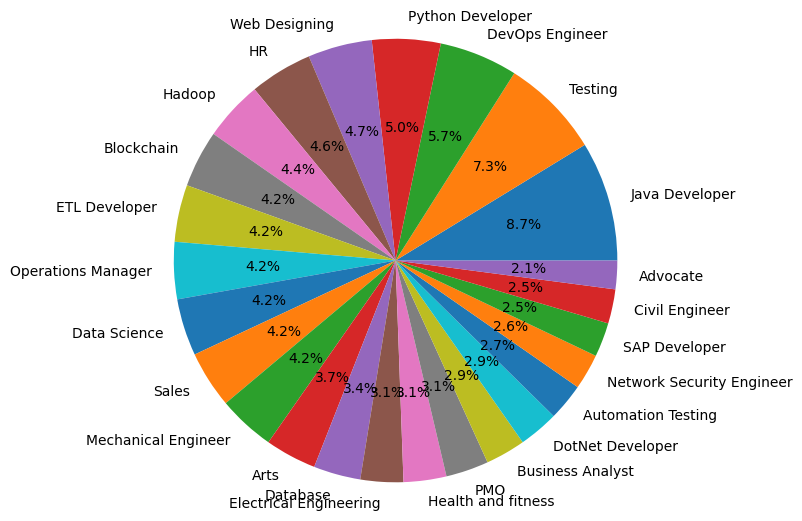

In [ ]:
plt.pie(x=targetCounts, labels = targetLabels, autopct="%1.1f%%", radius=1.5)
plt.imshow()

**Exercise 5: Convert all the `Resume` text to lower case and remove trailing spaces [0.5 Mark]**




In [ ]:
csv_data.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [ ]:
# Convert all characters to lowercase and remove trailing spaces
csv_data['Resume'] = csv_data['Resume'].str.lower().str.strip()

df = csv_data.copy()

In [ ]:
csv_data.head()

,Category,Resume
0,Data Science,skills * programming languages: python (pandas...
1,Data Science,education details \r\nmay 2013 to may 2017 b.e...
2,Data Science,"areas of interest deep learning, control syste..."
3,Data Science,skills â¢ r â¢ python â¢ sap hana â¢ table...
4,Data Science,"education details \r\n mca ymcaust, faridab..."


In [ ]:
sample_text = csv_data['Resume'][csv_data['Resume'].str.contains('')].values[0]
sample_text

'skills * programming languages: python (pandas, numpy, scipy, scikit-learn, matplotlib), sql, java, javascript/jquery. * machine learning: regression, svm, naã¯ve bayes, knn, random forest, decision trees, boosting techniques, cluster analysis, word embedding, sentiment analysis, natural language processing, dimensionality reduction, topic modelling (lda, nmf), pca & neural nets. * database visualizations: mysql, sqlserver, cassandra, hbase, elasticsearch d3.js, dc.js, plotly, kibana, matplotlib, ggplot, tableau. * others: regular expression, html, css, angular 6, logstash, kafka, python flask, git, docker, computer vision - open cv and understanding of deep learning.education details \r\n\r\ndata science assurance associate \r\n\r\ndata science assurance associate - ernst & young llp\r\nskill details \r\njavascript- exprience - 24 months\r\njquery- exprience - 24 months\r\npython- exprience - 24 monthscompany details \r\ncompany - ernst & young llp\r\ndescription - fraud investigatio

### Cleaning Resume

**Exercise 6: Define a function to clean the resume text [2 Mark]**

In the text there are special characters, urls, hashtags, mentions, etc. You need to remove for the following:  

* URLs: For reference click [here](https://stackoverflow.com/questions/11331982/how-to-remove-any-url-within-a-string-in-python)
* RT | cc: For reference click [here](https://www.machinelearningplus.com/python/python-regex-tutorial-examples/)
* Hashtags, # and Mentions, @
* punctuations
* extra whitespace

PS: Use the provided reference similarly for removing any other such elements.

After cleaning as above, store the Resume Text in a separate column (New Feature say `Cleaned_Resume`).


In [ ]:
import re
def cleanResume(resumeText):
    resumeText = re.sub(r'https?:\/\/.*[\r\n]|www\.\w+\.\w+[\r\n]|[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,}', '', resumeText, flags=re.MULTILINE)
    resumeText = re.sub(r'  |,|\.|\!|"|\-|:|;|\*', '', resumeText, flags=re.MULTILINE)
    resumeText = re.sub(r'\r\n', '', resumeText, flags=re.MULTILINE)
    return resumeText


In [ ]:
sample_text

'skills * programming languages: python (pandas, numpy, scipy, scikit-learn, matplotlib), sql, java, javascript/jquery. * machine learning: regression, svm, naã¯ve bayes, knn, random forest, decision trees, boosting techniques, cluster analysis, word embedding, sentiment analysis, natural language processing, dimensionality reduction, topic modelling (lda, nmf), pca & neural nets. * database visualizations: mysql, sqlserver, cassandra, hbase, elasticsearch d3.js, dc.js, plotly, kibana, matplotlib, ggplot, tableau. * others: regular expression, html, css, angular 6, logstash, kafka, python flask, git, docker, computer vision - open cv and understanding of deep learning.education details \r\n\r\ndata science assurance associate \r\n\r\ndata science assurance associate - ernst & young llp\r\nskill details \r\njavascript- exprience - 24 months\r\njquery- exprience - 24 months\r\npython- exprience - 24 monthscompany details \r\ncompany - ernst & young llp\r\ndescription - fraud investigatio

In [ ]:
cleanResume(sample_text)

'skills  programming languages python (pandas numpy scipy scikitlearn matplotlib) sql java javascript/jquery  machine learning regression svm naã¯ve bayes knn random forest decision trees boosting techniques cluster analysis word embedding sentiment analysis natural language processing dimensionality reduction topic modelling (lda nmf) pca & neural nets  database visualizations mysql sqlserver cassandra hbase elasticsearch d3js dcjs plotly kibana matplotlib ggplot tableau  others regular expression html css angular 6 logstash kafka python flask git docker computer vision  open cv and understanding of deep learningeducation details data science assurance associate data science assurance associate  ernst & young llpskill details javascript exprience  24 monthsjquery exprience  24 monthspython exprience  24 monthscompany details company  ernst & young llpdescription  fraud investigations and dispute services assurancetechnology assisted reviewtar (technology assisted review) assists in ac

In [ ]:
# Apply the function defined above and save the
df['Cleaned_Resume'] = df['Resume'].apply(lambda x: cleanResume(x))

In [ ]:
df.head()

,Category,Resume,Cleaned_Resume
0,Data Science,skills * programming languages: python (pandas...,skills programming languages python (pandas n...
1,Data Science,education details \r\nmay 2013 to may 2017 b.e...,education details may 2013 to may 2017 be uitr...
2,Data Science,"areas of interest deep learning, control syste...",areas of interest deep learning control system...
3,Data Science,skills â¢ r â¢ python â¢ sap hana â¢ table...,skills â¢ r â¢ python â¢ sap hana â¢ table...
4,Data Science,"education details \r\n mca ymcaust, faridab...",education details mca ymcaustfaridabadharyana...


**Exercise 7: Convert the categorical variable `Category` to a numerical feature and make a different column <font color="#990000">`label`</font>, which can be treated as the target variable [0.5 Mark]**

**Hint:** Use [`sklearn.preprocessing.LabelEncoder()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) method

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df["label"] = le.fit_transform(df["Category"])

In [ ]:
df.head()

,Category,Resume,Cleaned_Resume,label,Count
0,Data Science,skills * programming languages: python (pandas...,skills programming languages python (pandas n...,6,626
1,Data Science,education details \r\nmay 2013 to may 2017 b.e...,education details may 2013 to may 2017 be uitr...,6,129
2,Data Science,"areas of interest deep learning, control syste...",areas of interest deep learning control system...,6,237
3,Data Science,skills â¢ r â¢ python â¢ sap hana â¢ table...,skills â¢ r â¢ python â¢ sap hana â¢ table...,6,868
4,Data Science,"education details \r\n mca ymcaust, faridab...",education details mca ymcaustfaridabadharyana...,6,52


**Exercise 8: Plot the histogram of words count of `Cleaned_Resume` text [0.5 Mark]**

**Hint:** Use sns.distplot()

In [ ]:
df['Count'] = df['Cleaned_Resume'].apply(lambda x: len(x.split()))

In [ ]:
df.describe()

,label,Count
count,962.000000,962.000000
mean,12.968815,404.678794
std,7.051694,384.915418
min,0.000000,15.000000
25%,7.000000,140.750000
50%,13.000000,289.000000
75%,19.000000,522.000000
max,24.000000,2020.000000


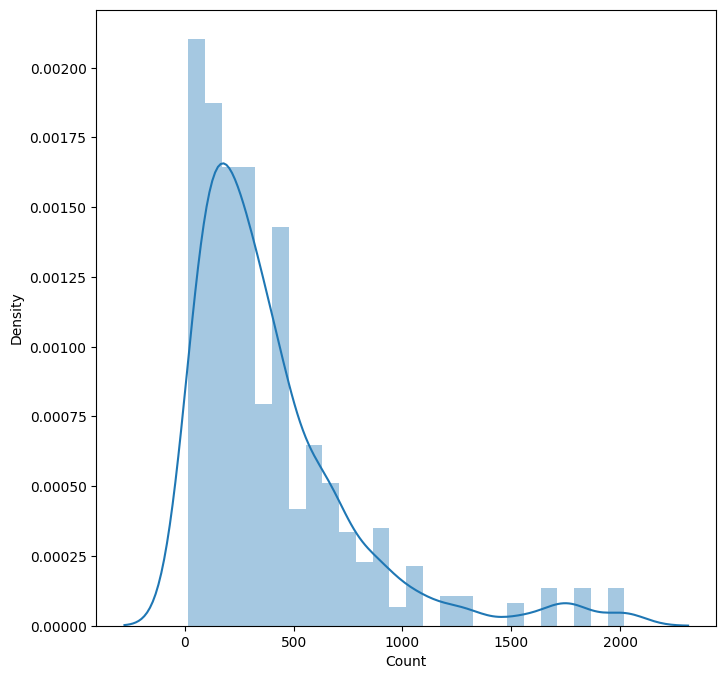

In [ ]:
plt.figure(figsize= (8, 8))

sns.distplot(df['Count'])

plt.show()

### Train Test Split

**Exercise 9: Split the dataset into training, validation, and testing set [0.5 Mark]**

* Do stratified splitting using `label` column

In [ ]:
train_test_df, val_df = train_test_split(df[['Cleaned_Resume','label']], test_size=0.2, random_state=42, stratify=df['label'])
train_df, test_df = train_test_split(train_test_df, test_size=0.2, random_state=42, stratify=train_test_df['label'])

len(train_df), len(val_df), len(test_df)
#sum([len(train_df), len(val_df), len(test_df)])

(615, 193, 154)

In [ ]:
train_df.head(5)

,Cleaned_Resume,label
591,training attended 1 successfully completed esd...,20
713,education details january 2016 bscmumbai mahar...,7
694,core competencies â¢ maintain processes to en...,19
624,skills visa b1visa (usa) onsite visits to swed...,8
567,training attended 1 successfully completed esd...,20


### Convert to HuggingFace Dataset

**Exercise 10: Convert Pandas dataframe to HuggingFace Dataset [1 Mark]**

**Hint:**

    import pandas as pd
    from datasets import Dataset, DatasetDict

    tdf = pd.DataFrame({"a": [1, 2, 3], "b": ['hello', 'ola', 'thammi']})
    vdf = pd.DataFrame({"a": [4, 5, 6], "b": ['four', 'five', 'six']})
    tds = Dataset.from_pandas(tdf)
    vds = Dataset.from_pandas(vdf)

    ds = DatasetDict()

    ds['train'] = tds
    ds['validation'] = vds

    print(ds)

In [ ]:
from datasets import Dataset, DatasetDict

train_ds = Dataset.from_pandas(train_df)
val_ds = Dataset.from_pandas(val_df)
test_ds = Dataset.from_pandas(test_df)

ds = DatasetDict()

ds['train'] = train_ds
ds['validation'] = val_ds
ds['test'] = test_ds

### Tokenizer

**Exercise 11: Load tokenizer for checkpoint `distilbert-base-uncased` [0.5 Mark]**

**Hint:** `AutoTokenizer`

In [ ]:
# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
def tokenize_fn(batch):
    return tokenizer(batch['Cleaned_Resume'], padding=True, truncation=True)


In [ ]:
tokenized_datasets = ds.map(tokenize_fn, batched=True)
tokenized_datasets

Map:   0%|          | 0/615 [00:00<?, ? examples/s]

Map:   0%|          | 0/193 [00:00<?, ? examples/s]

Map:   0%|          | 0/154 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['Cleaned_Resume', 'label', '__index_level_0__', 'input_ids', 'attention_mask'],
        num_rows: 615
    })
    validation: Dataset({
        features: ['Cleaned_Resume', 'label', '__index_level_0__', 'input_ids', 'attention_mask'],
        num_rows: 193
    })
    test: Dataset({
        features: ['Cleaned_Resume', 'label', '__index_level_0__', 'input_ids', 'attention_mask'],
        num_rows: 154
    })
})

In [ ]:
print(tokenized_datasets['train'][0])

{'Cleaned_Resume': 'training attended 1 successfully completed esd program conducted by zensar technologies pune in 2017 2 successfully completed employability training conducted by barclays global talent track and nasscom foundation in 2015 achievements 1 treasurer in ieee student branch at jscoe pune for 201718 2 worked as team leader in collegeâ\x80\x99s various technical and cultural events from 2016  2017 3 project idea got selected for final prototyping round in kpitsparkle 2018 pune 4 participated in avishkar 2017 conducted by savitribai phule pune university 5 project idea submitted in accenture innovation 2018 pune 6 brought sponsorship of rs 15000 from platinum auto (formerly royal enfield) in 2017 pune 7 secured 1 st rank for college level competition of poster presentation on smart ambulance in 2017 pune 8 organized ieee workshop on â\x80\x98excellence in english and public speakingâ\x80\x99 in 2017 pune workshops attended 1 successfully completed 4 daysâ\x80\x99 workshop o

In [ ]:
print(tokenized_datasets['test'][1]['Cleaned_Resume'])

technical skills skills java sql pl/sql c c++ bootstrap jsp ext js operating systems windows tools toad eclipse soapbox postman databases oracle mssql msaccess msexceleducation details january 2017 be computer technology gondia maharashtra in manoharbhai patel institute of engineering and technology hscgondia maharashtra in smp science collegejava developer java developer  xoriant solutions pvt ltdskill details company details company  xoriant solutions pvt ltddescription  puneperiodsept' 2017 to till daterolejava developerdescription resrent is a team responsible for the development of variousmodules for hertz they are responsible for the development of screens in the portfolios they look after and act as aprimary control function developing webservices to ensure it canbe hit by xml and json we build various modules which areinbuilt in hertz to provide interfaces for end users in their taskstools eclipse toad soapbox postmanresponsibilities develop module from backend to middleware to

In [ ]:
print(tokenized_datasets['test'][1]['label'])

15


### Load Pre-Trained Model

**Exercise 12: Load pre-trained Bert model with checkpoint `distilbert-base-uncased` and show model summary [0.5 Mark]**

**Hint:** `AutoModelForSequenceClassification`

In [ ]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=25)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
print(model)

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSdpaAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)


In [ ]:
#from transformers import DistilBertConfig
#config = DistilBertConfig.from_pretrained("distilbert-base-uncased", output_hidden_states=True)
#model = DistilBertForSequenceClassification(config)
#print(model.config)

DistilBertConfig {
  "_attn_implementation_autoset": true,
  "_name_or_path": "distilbert-base-uncased",
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4",
    "5": "LABEL_5",
    "6": "LABEL_6",
    "7": "LABEL_7",
    "8": "LABEL_8",
    "9": "LABEL_9",
    "10": "LABEL_10",
    "11": "LABEL_11",
    "12": "LABEL_12",
    "13": "LABEL_13",
    "14": "LABEL_14",
    "15": "LABEL_15",
    "16": "LABEL_16",
    "17": "LABEL_17",
    "18": "LABEL_18",
    "19": "LABEL_19",
    "20": "LABEL_20",
    "21": "LABEL_21",
    "22": "LABEL_22",
    "23": "LABEL_23",
    "24": "LABEL_24"
  },
  "initializer_range": 0.02,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_10": 10,
    "LABEL_11": 11,
    "LABEL_12": 12,
    "LABEL_13": 13,
    "LABEL_14": 14,
    

**Exercise 13: Freeze/Un-Freeze different layers  [0.5 Mark]**

**Hint:** Freeze layers starting with name *distilbert*


In [ ]:
# Display layers name
#distilbert_model = model.distilbert
#distilbert_model.named_parameters()
for name, param in model.named_parameters():
    print(name)

distilbert.embeddings.word_embeddings.weight
distilbert.embeddings.position_embeddings.weight
distilbert.embeddings.LayerNorm.weight
distilbert.embeddings.LayerNorm.bias
distilbert.transformer.layer.0.attention.q_lin.weight
distilbert.transformer.layer.0.attention.q_lin.bias
distilbert.transformer.layer.0.attention.k_lin.weight
distilbert.transformer.layer.0.attention.k_lin.bias
distilbert.transformer.layer.0.attention.v_lin.weight
distilbert.transformer.layer.0.attention.v_lin.bias
distilbert.transformer.layer.0.attention.out_lin.weight
distilbert.transformer.layer.0.attention.out_lin.bias
distilbert.transformer.layer.0.sa_layer_norm.weight
distilbert.transformer.layer.0.sa_layer_norm.bias
distilbert.transformer.layer.0.ffn.lin1.weight
distilbert.transformer.layer.0.ffn.lin1.bias
distilbert.transformer.layer.0.ffn.lin2.weight
distilbert.transformer.layer.0.ffn.lin2.bias
distilbert.transformer.layer.0.output_layer_norm.weight
distilbert.transformer.layer.0.output_layer_norm.bias
distil

In [ ]:
# Freezing

for name, param in model.named_parameters():
    if name.startswith('distilbert'):
        param.requires_grad = False

In [ ]:
for name, param in model.named_parameters():
    print(name, param.requires_grad)

distilbert.embeddings.word_embeddings.weight False
distilbert.embeddings.position_embeddings.weight False
distilbert.embeddings.LayerNorm.weight False
distilbert.embeddings.LayerNorm.bias False
distilbert.transformer.layer.0.attention.q_lin.weight False
distilbert.transformer.layer.0.attention.q_lin.bias False
distilbert.transformer.layer.0.attention.k_lin.weight False
distilbert.transformer.layer.0.attention.k_lin.bias False
distilbert.transformer.layer.0.attention.v_lin.weight False
distilbert.transformer.layer.0.attention.v_lin.bias False
distilbert.transformer.layer.0.attention.out_lin.weight False
distilbert.transformer.layer.0.attention.out_lin.bias False
distilbert.transformer.layer.0.sa_layer_norm.weight False
distilbert.transformer.layer.0.sa_layer_norm.bias False
distilbert.transformer.layer.0.ffn.lin1.weight False
distilbert.transformer.layer.0.ffn.lin1.bias False
distilbert.transformer.layer.0.ffn.lin2.weight False
distilbert.transformer.layer.0.ffn.lin2.bias False
distilbe

In [ ]:
# Display layers gradient

for name, param in model.named_parameters():
    print(name, param.requires_grad)

distilbert.embeddings.word_embeddings.weight False
distilbert.embeddings.position_embeddings.weight False
distilbert.embeddings.LayerNorm.weight False
distilbert.embeddings.LayerNorm.bias False
distilbert.transformer.layer.0.attention.q_lin.weight False
distilbert.transformer.layer.0.attention.q_lin.bias False
distilbert.transformer.layer.0.attention.k_lin.weight False
distilbert.transformer.layer.0.attention.k_lin.bias False
distilbert.transformer.layer.0.attention.v_lin.weight False
distilbert.transformer.layer.0.attention.v_lin.bias False
distilbert.transformer.layer.0.attention.out_lin.weight False
distilbert.transformer.layer.0.attention.out_lin.bias False
distilbert.transformer.layer.0.sa_layer_norm.weight False
distilbert.transformer.layer.0.sa_layer_norm.bias False
distilbert.transformer.layer.0.ffn.lin1.weight False
distilbert.transformer.layer.0.ffn.lin1.bias False
distilbert.transformer.layer.0.ffn.lin2.weight False
distilbert.transformer.layer.0.ffn.lin2.bias False
distilbe

### Metrics

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [ ]:
f1_score(y_true=[1,0,1], y_pred=[1,0,0], average='weighted')

0.6666666666666666

In [ ]:
def compute_metrics(logits_and_labels):
    logits, labels = logits_and_labels
    predictions = np.argmax(logits,axis=-1)
    return {'f1_score': f1_score(y_true=labels, y_pred=predictions, average='weighted')}


**Exercise 14: Fine-tune model on train dataset  [0.5 Mark]**
 * Create `TrainingArguments` class object
 * Create `Trainer` class  object
 * Train it for higher number of epochs say 40 or 50
 * Switch to GPU runtime if needed

**Hint:** Check if the training code is running without any error with CPU runtime, later switch to GPU runtime for faster training. Once trained, save the model, create its zip file, and download into your system.

In [ ]:
from transformers import TrainingArguments
from transformers import Trainer

In [ ]:
# Set up the training arguments

model_output_path = "/content/bert_model"

training_args = TrainingArguments(
    output_dir=model_output_path,
    learning_rate=2e-5)

In [ ]:
# Train the model

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics)

### Save Model

In [ ]:
# Save the model
trainer.save_model('saved_bert_model')

In [ ]:
!ls

bert_model  img.gif  sample_data  saved_bert_model  UpdatedResumeDataSet.csv


In [ ]:
# Create a Zip file and download
!zip -r saved_bert_model.zip saved_bert_model

  adding: saved_bert_model/ (stored 0%)
  adding: saved_bert_model/tokenizer_config.json (deflated 75%)
  adding: saved_bert_model/special_tokens_map.json (deflated 42%)
  adding: saved_bert_model/model.safetensors (deflated 8%)
  adding: saved_bert_model/config.json (deflated 64%)
  adding: saved_bert_model/training_args.bin (deflated 52%)
  adding: saved_bert_model/vocab.txt (deflated 53%)
  adding: saved_bert_model/tokenizer.json (deflated 71%)


### Load Model

**Exercise 15: Load the saved model and create a pipeline to perform text classification [1 Mark]**

 * Create the pipeline object for text classification
 * Create a `make_prediction` function to use pipeline object and output the prediction label

**Hint:** pipeline()

In [ ]:
from transformers import pipeline

In [ ]:
my_model = AutoModelForSequenceClassification.from_pretrained("saved_bert_model")

In [ ]:
# Function to predict label for a resume text

def make_prediction(input_text):

    pipe = pipeline("text-classification", model=my_model, tokenizer=tokenizer)

    return pipe(input_text)


In [ ]:
# Test prediction
make_prediction('programming, web designing, coding')

Device set to use cpu


[{'label': 'LABEL_18', 'score': 0.04651535302400589}]

In [ ]:
make_prediction('continuous integration and continuous delivery')

Device set to use cpu


[{'label': 'LABEL_18', 'score': 0.04618459567427635}]

In [ ]:
make_prediction('law student and journalist')

Device set to use cpu


[{'label': 'LABEL_8', 'score': 0.0472986176609993}]

In [ ]:
make_prediction('machine learning, data, EDA, big data, neural networks')

Device set to use cpu


[{'label': 'LABEL_16', 'score': 0.0453311912715435}]

In [ ]:
make_prediction('')

## **Optional**: Create a Gradio based web interface to test and display the model predictions

In [ ]:
!pip -q install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 MB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.4/321.4 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 3.9 MB/s eta 0:00:00


In [ ]:
import gradio

In [ ]:
# Textbox to take Input from user
in_text = gradio.Textbox(lines=10, placeholder=None, value="Enter resume text here", label='Resume Text')


# Textbox to display Output prediction
out_label = gradio.Textbox(type="text", label='Predicted Class Label')


# Gradio interface to create UI
iface = gradio.Interface(fn = make_prediction,             # fine-tuned model is used inside this function
                         inputs = [in_text],
                         outputs = [out_label],
                         title = "Resume Classification",
                         description = "Using fine-tuned Bert model",
                         allow_flagging = 'never')


# Launch interface
iface.launch(share = True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://87848a2c98bcc0540a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
